# Predicting NCAA® 2019 Men's March Madness With Machine Learning
### By Adam Bostwick, Mike Brown and Sarthak Jain

## INTRODUCTION

NCAA March Madness is a men’s collegiate basketball tournament that is played out to
crown the NCAA Men’s Basketball National Champions. This tournament generates
billions of dollars in revenue for the NCAA, bookmakers, and host cities of the
tournament. On top of the money earned for the entities involved, fans often participate
in bracket pools, where they attempt to pick the final bracket. 68 teams are invited to
participate based off of season performance and a selection committee. The first two
games are made up of the last two teams invited and each game determines the final
two seeds for the first round of 32 games. From the round of 32, the winners advance to
the Sweet 16, the Elite Eight, the Final Four, and then finally, the National
Championship game. The likelihood of predicting a bracket entirely correct is
approximately 1 in 9.2 quintillion, which are astronomical odds. However, after building
various statistical models, we have created a prediction machine that was over 50%
accurate in predicting a winner in the 2019 bracket.

Our study was based off of the “Google Cloud &amp; NCAA ML Competition 2019” on
Kaggle.com. Our initial data included team ID’s and names; tournament seeds since the
1984-85 season; final scores of all regular season, conference tournament, and NCAA
tournament games since the 1984-85 season; and season-level details including dates
and region names. Our secondary data included game-level statistics for each team and
it was divided up by winners and losers. Included in this secondary data were the
variables:

- W - Winner’s Data<br>
- L - Loser’s Data<br>
- FGM - Field Goals Made<br>
- FGA - Field Goals Attempted<br>
- FGM3 - Three Pointers Made<br>
- FGA3 - Three Pointers Attempted<br>
- FTM - Free Throws Made<br>
- FTA - Free Throws Attempted<br>
- OR - Offensive Rebounds<br>
- DR - Defensive Rebounds<br>
- Ast – Assists<br>
- TO - Turnovers Committed<br>
- Stl - Steals<br>
- Blk – Blocks<br>


The case for this analysis lies in the ability to correctly predict tournament seeding in
NCAA March Madness, using statistics derived from the data we received. For some,
creating correct brackets shows off their knowledge of collegiate basketball and making
some money outguessing their friends. However, for statistically inclined people,
predicting brackets is a venture to a greater solution. As the size of collegiate basketball
grows and predicting outcomes becomes more difficult, it is increasingly important to
take advantage of the proliferation of open source data and learning tools.
Understanding how to utilize predictive models, such as logistic regression, is arguably
more important than just having sports knowledge and experience.

In 1939, just eight teams competed in the inaugural NCAA basketball tournament, which
would make the odds of filling out a perfect bracket around one in 128. When the
tournament expanded to 16 teams in 1951, those odds were lowered to one in 32,768,
but this is still pretty good compared to your chances of filling out a perfect 64-team
bracket today, which is around one in 9.2 quintillion. The challenge, then, is improving
these daunting odds to the best of our ability. Tournament seeding modeling, or
“bracketology”, requires one to identify the most important factors to a team’s future
performance.

## CODE

In [2]:
import numpy as np 
import pandas as pd
import os
import pdpbox
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier

### Field descriptions:
- deltaSeed: difference in team's seeds<br>
- deltaMO: difference in team's Massey Ordinals on day 128<br>
- deltaWinPct: difference in the team's winning percentage<br>
- deltaPointsFor: difference in the average points scored per game<br>
- deltaPointsAgainst: difference in the average points scored agains the teams<br>
- deltaFGM: difference in the field goals made per game<br>
- deltaFGA: difference in the field goals attempted per game<br>
- deltaFGM3: difference in 3 point fields goals made per game<br>
- deltaFGA3: difference in the 3 points fields goals attempted per game<br>
- deltaFTM: difference in free throws made per game<br>
- deltaFTA: difference in free throws attempted per game<br>
- deltaOR: difference in offence rebounds per game<br>
- deltaDR: difference in defensive rebounds per game<br>
- deltaAst: difference in assists per game<br>
- deltaTO: difference in turnovers per game<br>
- deltaStl: difference in steals per game<br>
- deltaBlk: difference in blocks per game<br>
- deltaPF: difference in personal fouls per game<br>

### IMPORTING DATA

In [3]:
train = pd.read_csv('/Users/adambostwick/ML/Proj/NCAA2019/training_set.csv')
train.describe()

,Unnamed: 0,Result,Season,Team1,Team2,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,...,deltaFGA3,deltaFTM,deltaFTA,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,523.500000,0.491412,2010.591603,1296.412214,1293.711832,-0.371183,-2.197980,0.006562,0.081901,-0.103175,...,0.195447,0.081460,0.108963,0.032456,0.118952,-0.004337,-0.020774,0.050619,0.100732,-0.079078
std,302.675844,0.500165,4.611062,101.366772,107.297109,7.463033,67.632456,0.143552,7.282568,6.428469,...,4.158466,2.733403,3.681127,2.565783,2.494327,2.564618,2.085032,1.842304,1.876017,2.558900
min,0.000000,0.000000,2003.000000,1102.000000,1102.000000,-15.000000,-289.861905,-0.633333,-21.643382,-19.411290,...,-12.224265,-7.731034,-10.696970,-7.924632,-9.010776,-9.220143,-7.666667,-6.090133,-6.360606,-7.256303
25%,261.750000,0.000000,2007.000000,1217.000000,1206.750000,-7.000000,-27.059864,-0.083635,-4.643805,-4.452484,...,-2.463646,-1.791482,-2.187885,-1.646205,-1.501337,-1.755590,-1.385250,-1.138753,-1.062500,-1.886158
50%,523.500000,0.000000,2011.000000,1285.000000,1287.000000,0.000000,-1.579365,0.006629,-0.182709,-0.162350,...,0.354694,-0.000891,-0.034787,0.018360,0.169222,-0.097687,-0.022066,0.053866,0.000000,-0.016739
75%,785.250000,1.000000,2015.000000,1393.000000,1393.000000,5.000000,24.130680,0.100095,5.111677,4.370001,...,2.907855,1.930899,2.556985,1.739223,1.762533,1.755978,1.320824,1.257812,1.323848,1.706643
max,1047.000000,1.000000,2018.000000,1463.000000,1463.000000,15.000000,278.426564,0.515152,22.892857,25.035714,...,14.278495,8.059629,10.827586,9.214286,9.285714,7.811553,7.448276,6.283681,6.752688,7.896552


In [4]:
train = train.loc[train['Season'] >= 2013]
train

,Unnamed: 0,Result,Season,Team1,Team2,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,...,deltaFGA3,deltaFTM,deltaFTA,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF
646,646,1,2013,1299,1251,0,-31.600000,0.154412,-5.757353,-9.369485,...,0.737132,-0.512868,1.661765,0.584559,-0.371324,-0.713235,1.746324,1.698529,1.623162,0.505515
647,647,0,2013,1292,1388,0,11.636364,0.035985,-3.632576,-5.524621,...,-6.849432,0.911932,2.411932,0.214015,-0.208333,-0.348485,1.850379,1.059659,0.819129,3.074811
648,648,1,2013,1241,1254,0,2.200000,-0.017825,-14.278075,-12.040998,...,-1.915330,-3.526738,-5.440285,-1.787879,-0.900178,-3.537433,-3.217469,1.064171,0.984848,-0.580214
649,649,0,2013,1129,1247,0,-1.000000,-0.044828,-1.364368,0.481609,...,-1.051724,0.598851,0.555172,-0.375862,1.606897,-1.987356,0.575862,-1.445977,-1.911494,3.975862
650,650,1,2013,1112,1125,-5,-15.036364,-0.018750,-3.618750,-0.945833,...,-1.006250,2.229167,2.679167,2.164583,1.885417,-1.956250,-0.472917,-2.595833,1.172917,-1.856250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1043,1,2018,1242,1181,-1,5.030303,0.006239,-3.196970,1.335116,...,3.236185,-4.185383,-5.723708,-3.986631,-2.686275,-0.515152,-0.929590,-0.897504,-1.187166,-0.342246
1044,1044,0,2018,1403,1437,2,12.166667,-0.155080,-11.816399,-6.185383,...,-9.464349,2.320856,5.079323,1.617647,-1.266488,-2.252228,2.192513,0.717469,0.302139,2.298574
1045,1045,1,2018,1276,1260,-8,-34.407648,-0.049632,1.959559,1.498162,...,6.362132,-0.961397,0.292279,2.490809,-1.042279,-0.849265,-3.198529,-0.479779,0.713235,1.705882
1046,1046,1,2018,1437,1242,0,-6.742424,0.088235,5.558824,-0.058824,...,3.470588,2.470588,1.735294,-0.176471,0.558824,-0.323529,-1.323529,0.058824,-0.205882,0.558824


### CLEANING DATA

In [5]:
# list the column names
train.columns

Index(['Unnamed: 0', 'Result', 'Season', 'Team1', 'Team2', 'deltaSeed',
       'deltaMO', 'deltaWinPct', 'deltaPointsFor', 'deltaPointsAgainst',
       'deltaFGM', 'deltaFGA', 'deltaFGM3', 'deltaFGA3', 'deltaFTM',
       'deltaFTA', 'deltaOR', 'deltaDR', 'deltaAst', 'deltaTO', 'deltaStl',
       'deltaBlk', 'deltaPF'],
      dtype='object')

In [6]:
# split the dataset for cross validation
X = train.drop(['Result', 'Season', 'Team1', 'Team2', 'Unnamed: 0'], axis=1)
y = train.Result

X_columns = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=4)

In [7]:
train

,Unnamed: 0,Result,Season,Team1,Team2,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,...,deltaFGA3,deltaFTM,deltaFTA,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF
646,646,1,2013,1299,1251,0,-31.600000,0.154412,-5.757353,-9.369485,...,0.737132,-0.512868,1.661765,0.584559,-0.371324,-0.713235,1.746324,1.698529,1.623162,0.505515
647,647,0,2013,1292,1388,0,11.636364,0.035985,-3.632576,-5.524621,...,-6.849432,0.911932,2.411932,0.214015,-0.208333,-0.348485,1.850379,1.059659,0.819129,3.074811
648,648,1,2013,1241,1254,0,2.200000,-0.017825,-14.278075,-12.040998,...,-1.915330,-3.526738,-5.440285,-1.787879,-0.900178,-3.537433,-3.217469,1.064171,0.984848,-0.580214
649,649,0,2013,1129,1247,0,-1.000000,-0.044828,-1.364368,0.481609,...,-1.051724,0.598851,0.555172,-0.375862,1.606897,-1.987356,0.575862,-1.445977,-1.911494,3.975862
650,650,1,2013,1112,1125,-5,-15.036364,-0.018750,-3.618750,-0.945833,...,-1.006250,2.229167,2.679167,2.164583,1.885417,-1.956250,-0.472917,-2.595833,1.172917,-1.856250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,1043,1,2018,1242,1181,-1,5.030303,0.006239,-3.196970,1.335116,...,3.236185,-4.185383,-5.723708,-3.986631,-2.686275,-0.515152,-0.929590,-0.897504,-1.187166,-0.342246
1044,1044,0,2018,1403,1437,2,12.166667,-0.155080,-11.816399,-6.185383,...,-9.464349,2.320856,5.079323,1.617647,-1.266488,-2.252228,2.192513,0.717469,0.302139,2.298574
1045,1045,1,2018,1276,1260,-8,-34.407648,-0.049632,1.959559,1.498162,...,6.362132,-0.961397,0.292279,2.490809,-1.042279,-0.849265,-3.198529,-0.479779,0.713235,1.705882
1046,1046,1,2018,1437,1242,0,-6.742424,0.088235,5.558824,-0.058824,...,3.470588,2.470588,1.735294,-0.176471,0.558824,-0.323529,-1.323529,0.058824,-0.205882,0.558824


In [8]:
X_train

,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,deltaFGM,deltaFGA,deltaFGM3,deltaFGA3,deltaFTM,deltaFTA,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF
688,8,39.863636,-0.097696,-3.794470,4.301382,-0.363134,-1.597235,-2.024885,-4.856221,-1.043318,-2.858065,-3.575115,2.025806,-0.478341,-0.080184,-3.111521,-1.458065,0.151152
986,9,49.054113,-0.036542,3.814617,5.338681,1.873440,7.758467,2.724599,7.556150,-2.656863,-1.834225,2.000891,0.200535,1.522282,0.099822,1.241533,-0.225490,3.651515
774,-1,-6.937500,0.094474,-0.486631,-6.428699,2.023173,3.121212,-2.463458,-5.934938,-2.069519,0.019608,3.800357,1.900178,2.967023,2.380570,0.882353,0.720143,1.501783
748,15,230.340625,-0.633333,-12.939394,4.854545,-2.993939,-0.257576,-0.515152,-0.827273,-6.436364,-7.809091,-1.145455,-5.993939,-1.996970,-1.487879,-1.315152,-2.454545,1.890909
788,9,100.604762,0.064516,8.645161,9.612903,3.096774,5.064516,4.129032,8.354839,-1.677419,-2.741935,-1.129032,-0.129032,-0.483871,-1.645161,-1.451613,-0.290323,-2.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,1,9.809524,0.021505,-11.604106,-7.250244,-4.669599,-6.701857,-3.415445,-7.334311,1.150538,1.684262,0.988270,-6.315738,-3.505376,0.099707,2.304008,0.548387,3.071359
1031,-5,-19.023810,0.089286,6.971429,3.301786,2.224107,4.458036,1.691964,2.617857,0.831250,-0.808929,1.494643,-0.352679,2.759821,-1.533929,0.063393,-1.649107,-1.035714
843,3,9.558621,-0.073529,2.663603,3.880515,2.031250,-0.858456,1.873162,0.906250,-3.272059,-4.215074,-1.435662,0.955882,5.430147,-0.194853,-2.988971,-0.941176,0.840074
820,-3,-8.348870,0.165441,9.261029,4.459559,3.512868,-0.843750,2.514706,4.996324,-0.279412,-2.202206,-3.863971,-0.090074,3.617647,-1.992647,0.507353,0.621324,-3.419118


In [9]:
X_test

,deltaSeed,deltaMO,deltaWinPct,deltaPointsFor,deltaPointsAgainst,deltaFGM,deltaFGA,deltaFGM3,deltaFGA3,deltaFTM,deltaFTA,deltaOR,deltaDR,deltaAst,deltaTO,deltaStl,deltaBlk,deltaPF
830,-5,-7.483333,-0.106262,2.625237,8.902277,0.015180,0.486717,-1.079696,-3.696395,3.674573,4.324478,0.210626,2.859583,-0.380455,3.439279,-0.535104,1.255218,1.004744
652,-7,-25.300000,0.082111,3.542522,-0.811339,-0.383187,0.347019,2.452590,6.560117,1.856305,3.106549,0.789834,1.865103,1.935484,1.512219,1.407625,1.076246,0.616813
707,7,22.754545,-0.023173,0.138146,2.766488,-0.502674,0.227273,0.557932,2.377005,0.585561,1.003565,2.480392,0.475936,0.460784,2.188057,0.682709,0.167558,2.160428
958,8,37.871512,-0.046921,7.084066,10.149560,1.407625,4.683284,1.235582,2.896383,3.033236,3.399804,-1.889541,0.367546,-0.180841,-2.267840,2.113392,0.553275,-1.768328
746,-9,-72.246448,0.128342,8.732620,3.401070,4.392157,3.475936,0.624777,-1.373440,-0.676471,-3.549020,-0.699643,0.043672,4.690731,-0.925134,2.412656,-0.905526,-3.688948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,-8,-27.674213,0.110459,-10.217009,-11.494624,-2.272727,-7.310850,-1.096774,-3.536657,-4.574780,-6.782014,-2.449658,-2.090909,-0.021505,-0.831867,-1.289345,-0.415445,-3.539589
839,-4,-9.475287,0.011029,0.055147,-0.661765,-0.937500,2.327206,-0.779412,0.156250,2.709559,1.183824,-0.501838,0.919118,-4.617647,0.507353,1.582721,0.472426,-2.152574
871,-5,-50.753543,-0.011364,3.798295,5.153409,1.292614,5.700758,-1.122159,-1.195076,2.335227,5.777462,5.636364,-0.802083,-0.379735,0.678030,-0.631629,1.738636,5.416667
879,3,-15.153390,0.105882,5.205882,-3.272549,2.729412,4.668627,0.431373,2.078431,-0.684314,-1.282353,1.933333,0.886275,0.986275,-0.092157,1.460784,0.556863,-0.674510


In [10]:
# convert from pandas dataframe to numpy array for implementation
X_train_np = X_train.values
X_test_np = X_test.values
y_train_np = y_train.values 
y_test_np = y_test.values
X_columns_np = X_columns.values

### PERCEPTRON FUNCTIONS

In [11]:
def pTrain(x, y, T=100, beta=1, betaRate = [1, -1, -1]):
    if betaRate[1] == -1:
        betaRate[1] = T + 1
    ns = x.shape[0]
    nf = x.shape[1]

    w = np.zeros(nf)
    #x = np.concatenate([x, np.ones((ns,1))],axis=1)

    for i in range(T):
        if i >= betaRate[1] and i <= betaRate[2]:
            beta = beta * betaRate[0]
        for j in range(ns):
            yHat = predict(w,x[j,:])
            
            if yHat != y[j]:
                wDelta = np.dot((beta * y[j]), x[j,:])
                w = w + wDelta    
    return w

In [12]:
def predict(wt,xData):
    if np.dot(wt,xData) > 0:
            yPredicted = 1
    else:
            yPredicted = 0
    return yPredicted

In [13]:
def accuracy(predicted,actual):
    correctList = []
    nData = len(actual)
    for pred, act in zip(predicted, actual):
        if pred == act:
            correct = 1
        else:
            correct = 0
        correctList.append(correct)
    nCorrect = np.sum(np.array(correctList))
    pCorrect = (nCorrect/nData)*100
    
    return [nCorrect, pCorrect]

### PERCEPTRON IMPLEMENTATION

In [14]:
#training perceptron
weight = pTrain(X_train_np, y_train_np, 10)
print(weight)

[ 155.          -46.85103779    0.75081459   16.73673384  -65.96938748
   37.79548061   27.75087278  -29.96035038    6.94382904  -28.89387701
   14.53638955   28.01689002  -80.82179344  -34.29114064    6.98017839
   88.1108913    -7.65630828 -108.13278663]


In [15]:
#predicting with perceptron and analyzing accuracy
p = []
for d in X_test_np:
    p.append(predict(weight, d))

err = accuracy(p,list(y_test_np))
print("Number correct: ", err[0], " out of ", len(X_test_np))
print("Percentage correct: ", err[1], "%")
    

Number correct:  57  out of  81
Percentage correct:  70.37037037037037 %


In [16]:
#weight analasys
sortedIndex = np.argsort(abs(weight))
sortedIndexNeg = np.argsort(weight)
headerSorted = X_columns_np[sortedIndex]
headerSortedNeg = X_columns_np[sortedIndexNeg]
print(headerSorted)

['deltaWinPct' 'deltaFGA3' 'deltaTO' 'deltaBlk' 'deltaFTA'
 'deltaPointsFor' 'deltaFGA' 'deltaOR' 'deltaFTM' 'deltaFGM3' 'deltaAst'
 'deltaFGM' 'deltaMO' 'deltaPointsAgainst' 'deltaDR' 'deltaStl' 'deltaPF'
 'deltaSeed']


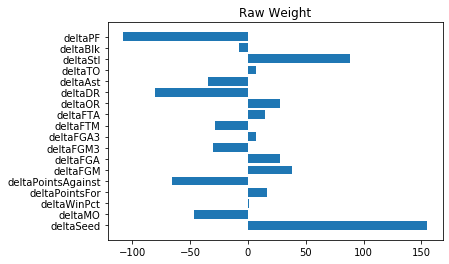

In [17]:
%matplotlib inline
plt.barh(np.array(X_columns_np),weight)
plt.title("Raw Weight")
plt.show()

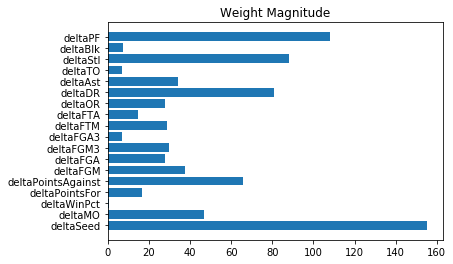

In [18]:
plt.barh(np.array(X_columns_np),abs(weight))
plt.title("Weight Magnitude")
plt.show()

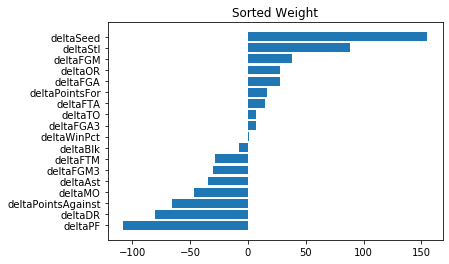

In [19]:
plt.barh(np.array(headerSortedNeg),weight[sortedIndexNeg])
plt.title("Sorted Weight")
plt.show()

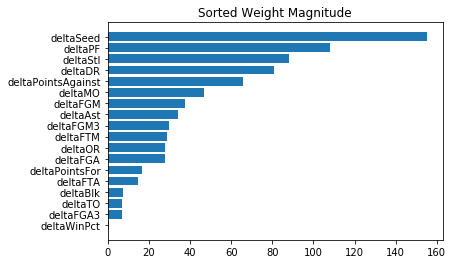

In [20]:
plt.barh(np.array(headerSorted),abs(weight[sortedIndex]))
plt.title("Sorted Weight Magnitude")
plt.savefig("sortedWeightMag.png", bbox_inches="tight")
plt.show()


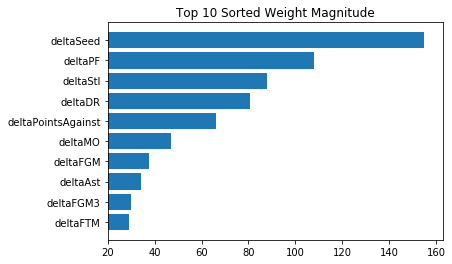

In [21]:
sortedWMag = abs(weight[sortedIndex])
fig, ax = plt.subplots()
ax.barh(np.array(headerSorted[-10:]),sortedWMag[-10:])

plt.title("Top 10 Sorted Weight Magnitude")
ax.set_xlim(20)
plt.savefig("top10SortedWeightMag.png", bbox_inches="tight")
plt.show()

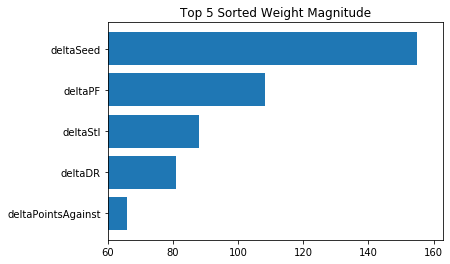

In [22]:
fig, ax = plt.subplots()
ax.barh(np.array(headerSorted[-5:]),sortedWMag[-5:])

plt.title("Top 5 Sorted Weight Magnitude")
ax.set_xlim(60)
plt.savefig("top5SortedWeightMag.png", bbox_inches="tight")
plt.show()

The charts above give a good sense as to which features are more important than others based on the amount of sway they have on the prediction. It is interesting to note that the deltaWinPct is the least valuable feature even though it is probably the statistic that is used most when people try to predict who is going to win a game. It is also interesting to notice how much the personal fouls affect the prediction and how it is more important than the amount of shots made. The fact that the defensive rebounds and points against are more important than offensive rebound and points for shows that, ultimateley, defense is more important than offense in a game.

### Investigating results if using just the top 10 features based on weight


In [23]:
#training perceptron for top 10
X_train_np_sorted = X_train_np[:,sortedIndex]
X_train_np_top10 = X_train_np_sorted[:,-10:]

weight = pTrain(X_train_np_top10, y_train_np, 26)
print(weight)

[-12.74727649 -42.7266921  -68.67887507 104.85136264 -44.13893938
 -38.22037647 -91.07524549 133.87584862 -72.92902388 129.        ]


In [24]:
#predicting with perceptron with top 10 features by weight and analyzing accuracy
X_test_np_sorted = X_test_np[:,sortedIndex]
X_test_np_top10 = X_test_np_sorted[:,-10:]
p = []
for d in X_test_np_top10:
    p.append(predict(weight, d))

err = accuracy(p,list(y_test_np))
print("Number correct: ", err[0], " out of ", len(X_test_np))
print("Percentage correct: ", err[1], "%")

Number correct:  57  out of  81
Percentage correct:  70.37037037037037 %


After running the perceptron optimization algorithm and finding the ideal amount of iterations for perceptron training, we get the same accuracy with the top 10 features as we did with all of the features.

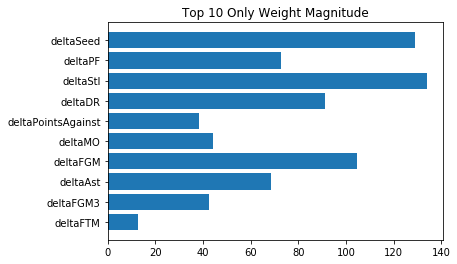

In [25]:
plt.barh(np.array(headerSorted[-10:]),abs(weight))
plt.title("Top 10 Only Weight Magnitude")
plt.show()

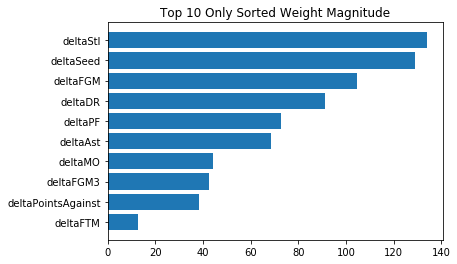

In [26]:
sortedIndex10 = np.argsort(abs(weight))
headerSorted10 = headerSorted[-10:][sortedIndex10]
plt.barh(np.array(headerSorted10),abs(weight[sortedIndex10]))
plt.title("Top 10 Only Sorted Weight Magnitude")
plt.savefig("justTop10SortedWeightMag.png", bbox_inches="tight")
plt.show()

### Investigating results if using just the top 5 features based on weight

In [27]:
#training perceptron for top 5
X_train_np_top5 = X_train_np_sorted[:,-5:]
weight = pTrain(X_train_np_top5, y_train_np, 459)
print(weight)

[ -2.50543143  -0.68775413   8.41218807  -3.21626027 -12.        ]


In [28]:
#predicting with perceptron with top 5 features by weight and analyzing accuracy
X_test_np_top5 = X_test_np_sorted[:,-5:]
p = []
for d in X_test_np_top5:
    p.append(predict(weight, d))

err = accuracy(p,list(y_test_np))
print("Number correct: ", err[0], " out of ", len(X_test_np))
print("Percentage correct: ", err[1], "%")

Number correct:  59  out of  81
Percentage correct:  72.8395061728395 %


After running percepron optimization, the perceptron rinning with only the top 5 features has a notably higher accuracy than the perceptron running with the top ten or all features. This is likely because it removes the noise that the less important features were causing, thus the result is more accurate as it does not need to consider the less important features which ultimately throw the perceptron off.

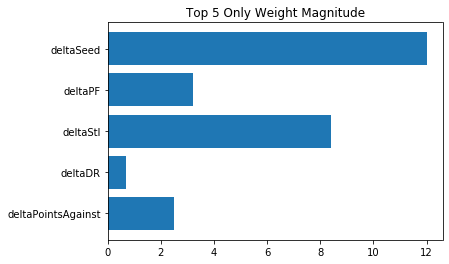

In [29]:
plt.barh(np.array(headerSorted[-5:]),abs(weight))
plt.title("Top 5 Only Weight Magnitude")
plt.show()

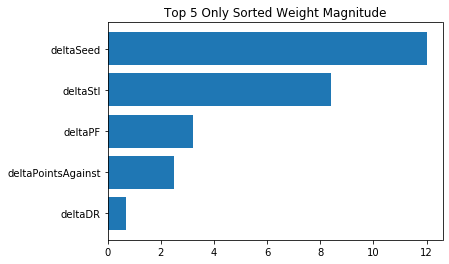

In [30]:
sortedIndex5 = np.argsort(abs(weight))
headerSorted5 = headerSorted[-5:][sortedIndex5]
plt.barh(np.array(headerSorted5),abs(weight[sortedIndex5]))
plt.title("Top 5 Only Sorted Weight Magnitude")
plt.savefig("justTop5SortedWeightMag.png", bbox_inches="tight")
plt.show()

It is found that excluding the deltaSeed feature gives a higher accuracy than when all features are included but a lower accuracy than when the top 5 features, including deltaSeed, are included. This shows that the noise reduction is a high factor in increasing accuracy of the predictions. It also show the value that the deltaSeed feature adds when making predictions.

In [31]:
#training perceptron for top 5 excluding seed
X_train_np_top5_noSeed = X_train_np_sorted[:,-6:-1]
weight = pTrain(X_train_np_top5_noSeed, y_train_np, 111)
print(weight)

[-144.39468124  -22.01405335  -52.27885494  230.78914019 -142.40929756]


In [32]:
#predicting with perceptron with top 5 features by weight excluding seed and analyzing accuracy
X_test_np_top5_noSeed = X_test_np_sorted[:,-6:-1]
p = []
for d in X_test_np_top5_noSeed:
    p.append(predict(weight, d))

err = accuracy(p,list(y_test_np))
print("Number correct: ", err[0], " out of ", len(X_test_np))
print("Percentage correct: ", err[1], "%")

Number correct:  58  out of  81
Percentage correct:  71.60493827160494 %


It is found that excluding the deltaSeed feature produces less accuracy than with the deltaSeed feature as expected. However, it is still more accurate to take the next top 5 after deltaSeed as it reduces teh noise of the other, less important features.


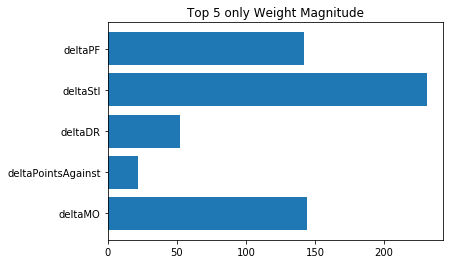

In [33]:
plt.barh(np.array(headerSorted[-6:-1]),abs(weight))
plt.title("Top 5 only Weight Magnitude")
plt.show()

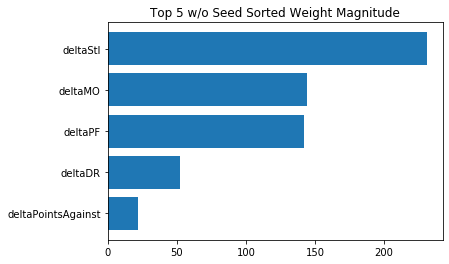

In [34]:
sortedIndex5NoSeed = np.argsort(abs(weight))
headerSorted5NoSeed = headerSorted[-6:-1][sortedIndex5NoSeed]
plt.barh(np.array(headerSorted5NoSeed),abs(weight[sortedIndex5NoSeed]))
plt.title("Top 5 w/o Seed Sorted Weight Magnitude")
plt.savefig("justTop5NoSeedSortedWeightMag.png", bbox_inches="tight")
plt.show()

### Investigating results if using just the next top 5 features after deltaSeed

In [35]:
#perceptron optimization
def optimizePerceptron(trainingSet=X_train_np, testingSet=X_test_np):
    pErrList = []
    maxPerr = [0,0]
    for t in range(1,500):
        p = []
        weight = pTrain(trainingSet, y_train_np, t)
        for d in testingSet:
            p.append(predict(weight, d))
        err = accuracy(p,list(y_test_np))
        pErr = [err[1],t]
        pErrList.append(pErr)
        if err[1] > maxPerr[0]:
            maxPerr = pErr
            sys.stdout.write("\r" + str(maxPerr))
            sys.stdout.flush()
    pErrListSorted = sorted(pErrList, key=lambda x: x[0], reverse = True)
    print("\n")
    for er in pErrListSorted[0:9]:
        print(er)


In [36]:
optimizePerceptron()

[70.37037037037037, 10]

[70.37037037037037, 10]
[70.37037037037037, 11]
[70.37037037037037, 62]
[69.1358024691358, 43]
[69.1358024691358, 201]
[69.1358024691358, 216]
[69.1358024691358, 319]
[69.1358024691358, 489]
[67.90123456790124, 17]


In [37]:
optimizePerceptron(X_train_np_top10, X_test_np_top10)

[70.37037037037037, 7]

[70.37037037037037, 7]
[70.37037037037037, 26]
[70.37037037037037, 198]
[70.37037037037037, 381]
[70.37037037037037, 424]
[69.1358024691358, 5]
[69.1358024691358, 8]
[69.1358024691358, 12]
[69.1358024691358, 13]


In [38]:
optimizePerceptron(X_train_np_top5, X_test_np_top5)

[72.8395061728395, 459]

[72.8395061728395, 459]
[71.60493827160494, 83]
[71.60493827160494, 230]
[71.60493827160494, 265]
[71.60493827160494, 458]
[71.60493827160494, 465]
[70.37037037037037, 10]
[70.37037037037037, 12]
[70.37037037037037, 21]


In [39]:
optimizePerceptron(X_train_np_top5_noSeed, X_test_np_top5_noSeed)

[71.60493827160494, 2]

[71.60493827160494, 2]
[71.60493827160494, 17]
[71.60493827160494, 45]
[71.60493827160494, 83]
[71.60493827160494, 97]
[71.60493827160494, 111]
[71.60493827160494, 132]
[71.60493827160494, 139]
[71.60493827160494, 141]


### KNN FUNCTIONS

In [40]:
def knn(x, q, k=5, tp='c', dist='euc'):
    from scipy import stats
    distanceList = []
    j = 0
    for neighbor in x:
        if not j == q:
            if dist == 'man':
                distance = getManDistance(np.array(x[q]), np.array(neighbor))
            else:
                distance = getEucDistance(np.array(x[q]), np.array(neighbor))
            distanceList.append([distance, j])
        j += 1

    #sorting & trim
    sortedDistances = []
    distanceArray = np.array(distanceList)
    srtD = distanceArray[np.argsort(distanceArray[:,0])]
    srtReduced = srtD[0:k]
    sortedDistances.append(srtReduced)
    if tp == 'r':
        result = np.mean(np.array(srtReduced[:,1]))
    else:
        result = int(stats.mode(np.array(srtReduced[:,1]))[0][0])
        
    return result

In [41]:
def knnLoop(dataSet, labels, k, tpe = 'c', dst='euc'):
    nDta = len(labels)
    pList = []
    aList = []
    for query in range(0,nDta):
        #print(query)
        sDist = knn(dataSet, query, k, tpe, dst)
        predicted = labels[sDist]
        actual = labels[query]
        pList.append(predicted)
        aList.append(actual)

    return [pList, aList]

In [42]:
def getEucDistance(here, there):
    return np.linalg.norm(here - there)

In [43]:
def getManDistance(here, there):
    return np.abs(here - there).sum()

In [44]:
#combining train and test sets for knn
X_np = np.append(X_train_np, X_test_np, axis = 0)
y_np = np.append(y_train_np, y_test_np)

### KNN IMPLEMENTATION

In [45]:
#KNN implementation
pk = knnLoop(X_np,y_np, 102)
errKNN = accuracy(pk[0],list(y_np))
print(errKNN[0])
print(errKNN[1])

263
65.4228855721393


In [46]:
#KNN implementation
pk = knnLoop(X_np,y_np, 109, 'c', 'man')
errKNN = accuracy(pk[0],list(y_np))
print(errKNN[0])
print(errKNN[1])

248
61.69154228855721


In [47]:
#k optimization
def optimizeK(t = 'c', d = 'euc'):
    maxErr = [0,0]
    errList = []
    for k in range (1,200):
        pk = knnLoop(X_np,y_np, k, t, d)
        errKNN = accuracy(pk[0],list(y_np))
        errForList = [errKNN[1],k]
        errList.append(errForList)
        if errKNN[1] > maxErr[0]:
            maxErr = errForList
            sys.stdout.write("\r" + str(maxErr))
            sys.stdout.flush()
            
    errListSorted = sorted(errList, key=lambda x: x[0], reverse = True)
    print("\n")
    for res in errListSorted[0:19]:
        print(res)


In [48]:
optimizeK()

[65.4228855721393, 102]

[65.4228855721393, 102]
[65.4228855721393, 103]
[65.4228855721393, 104]
[65.17412935323384, 99]
[65.17412935323384, 100]
[65.17412935323384, 101]
[64.92537313432835, 92]
[64.92537313432835, 98]
[64.92537313432835, 105]
[64.92537313432835, 106]
[64.92537313432835, 107]
[64.92537313432835, 110]
[64.92537313432835, 111]
[64.92537313432835, 112]
[64.92537313432835, 123]
[64.6766169154229, 3]
[64.6766169154229, 90]
[64.6766169154229, 91]
[64.6766169154229, 93]


In [49]:
optimizeK('c', 'man')

[62.93532338308457, 129]

[62.93532338308457, 129]
[62.93532338308457, 132]
[62.68656716417911, 124]
[62.68656716417911, 128]
[62.68656716417911, 131]
[62.43781094527363, 123]
[62.43781094527363, 126]
[62.43781094527363, 127]
[62.43781094527363, 130]
[62.43781094527363, 133]
[62.189054726368155, 116]
[62.189054726368155, 117]
[62.189054726368155, 122]
[62.189054726368155, 125]
[61.940298507462686, 114]
[61.940298507462686, 115]
[61.940298507462686, 119]
[61.940298507462686, 134]
[61.69154228855721, 109]


Above is a list of the top 20 most accurate results with different k values for the kNN algorithm using Euclidean and manhattan distance respectively. The first thing that is noticed is that the Euclidean distance gives a notably higher accuracy than that of the manhattan distance. This is likely because the manhattan distance allows more sway from noise. The next thing that is noticed is that the most accurate predictions come with extremely high values of k. This is a problem for multiple reasons. First, higher values of k require more computation time which is inefficient and defeats the purpose of using the kNN algorithm. The other problem is that higher values of k can give a false sense of accuracy, meaning, this kNN algorithm is probably not nearly as accurate as it may seem in these tests. 

## Conclusion - Hand Built

When comparing the kNN and the Perceptron algorithms, it is immediately clear that the Perceptron is much more accurate and reliable. On top of that, the perceptron is less computationally intensive, especially when considering the extremely high k values that the optimization algorithm found. Even when running the perceptron with an ammount of features that produced the least accurate results, it is still more accurate than the kNN algorithm at its best performance.

The most accurate prediction found here is that of a perceptron running with the top 5 most influential features. Therefore, it can be concluded that 72.84% is the highest accuracy that a simple linear perceptron can produce.

### PACKAGE PERCEPTRON

In [50]:
#Package perceptron with no feature selection
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train,y_train_np)
ppn_pred = ppn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test_np,ppn_pred))

Accuracy: 0.65


In [51]:
#Package perceptron with feature selection
ppn = Perceptron(max_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train_np_top5_noSeed,y_train_np)
ppn_pred = ppn.predict(X_test_np_top5_noSeed)
print('Accuracy: %.2f' % accuracy_score(y_test_np,ppn_pred))

Accuracy: 0.70


### PACKAGE KNN

In [52]:
#kNN without feature selection
pknn = KNeighborsClassifier(n_neighbors=3)
pknn.fit(X_train,y_train_np)
pknn_pred = pknn.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test_np,pknn_pred))

Accuracy: 0.65


## Conclusion - Prebuilt Packages
Using sklearn perceptron and kNN packages, similar results can be seen compared to those from the hand-built models. This confirms the validity of the hand-buit models and allows for further assessment and adjustment to achieve optimal results. Furthermore, the results of the package models are consistent with those of the hand-built models in that the perceptron tends to perform better for this dataset.

# CONCLUSION

Comparing the hand built models to the pre-built package models, it is clear that our hand built models preformed better overall, producing a higher accuracy than that of the pre-built models. Looking past this project, our model performed on par with models created by common household names in the world of bracketology, however, we believe that there is always room for improvement. One such way that we might be able to improve prediction accuracy, would be to incorporate other statistical models into an overarching linear regression model, and then make predictions based off of that. Another way that our model could improve, would be utilizing an extra variable in the later rounds of the
tournament to manage the potential “Cinderella Stories.”